In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_control = pd.read_csv('control_group.csv', delimiter=';')
df_control['Date'] = pd.to_datetime(df_control['Date'], dayfirst=True)

df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_test = pd.read_csv('test_group.csv', delimiter=';')
df_test['Date'] = pd.to_datetime(df_test['Date'], dayfirst=True)
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [4]:
df_control.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

df_test.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [5]:
df_control.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [9]:
df_control["Number of Impressions"].fillna(value=df_control["Number of Impressions"].mean(), 
                                             inplace=True)
df_control["Reach"].fillna(value=df_control["Reach"].mean(), 
                             inplace=True)
df_control["Website Clicks"].fillna(value=df_control["Website Clicks"].mean(), 
                                      inplace=True)
df_control["Searches Received"].fillna(value=df_control["Searches Received"].mean(), 
                                         inplace=True)
df_control['Added to Cart'].fillna(value=df_control['Added to Cart'].mean(),inplace=True)
df_control["Purchases"].fillna(value=df_control["Purchases"].mean(), 
                                 inplace=True)
df_control['Content Viewed'].fillna(value=df_control['Content Viewed'].mean(),inplace=True)

In [11]:
df_test.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [12]:
df_control.shape

(30, 10)

In [13]:
df_test.shape

(30, 10)

In [14]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Campaign Name          30 non-null     object        
 1   Date                   30 non-null     datetime64[ns]
 2   Amount Spent           30 non-null     int64         
 3   Number of Impressions  30 non-null     float64       
 4   Reach                  30 non-null     float64       
 5   Website Clicks         30 non-null     float64       
 6   Searches Received      30 non-null     float64       
 7   Content Viewed         30 non-null     float64       
 8   Added to Cart          30 non-null     float64       
 9   Purchases              30 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Campaign Name          30 non-null     object        
 1   Date                   30 non-null     datetime64[ns]
 2   Amount Spent           30 non-null     int64         
 3   Number of Impressions  30 non-null     int64         
 4   Reach                  30 non-null     int64         
 5   Website Clicks         30 non-null     int64         
 6   Searches Received      30 non-null     int64         
 7   Content Viewed         30 non-null     int64         
 8   Added to Cart          30 non-null     int64         
 9   Purchases              30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [17]:
df_control.describe()

,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
min,2019-08-01 00:00:00,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,2019-08-08 06:00:00,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2019-08-15 12:00:00,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000
75%,2019-08-22 18:00:00,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,2019-08-30 00:00:00,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000
std,NaN,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508


In [18]:
df_test.describe()

,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
min,2019-08-01 00:00:00,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2019-08-08 06:00:00,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2019-08-15 12:00:00,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2019-08-22 18:00:00,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,2019-08-30 00:00:00,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000
std,NaN,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745


In [19]:
df= df_control.merge(df_test, 
                             how="outer").sort_values(["Date"])
df = df.reset_index(drop=True)
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8472\112656353.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df= df_control.merge(df_test,


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,Test Campaign,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


In [20]:
df["Campaign Name"].value_counts()

Campaign Name
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64

In [22]:
df['Click-Through-Rate'] = df['Website Clicks']/df['Number of Impressions']
df['Conversion-Rate'] = df['Purchases']/df['Website Clicks']
df['Cost-Per-Click'] = df['Amount Spent']/df['Website Clicks']
df['Cost-Per-Acquisition'] = df['Amount Spent']/df['Purchases']

In [23]:
df

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases,Click-Through-Rate,Conversion-Rate,Cost-Per-Click,Cost-Per-Acquisition
0,Control Campaign,2019-08-01,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000,0.084835,0.088084,0.324971,3.689320
1,Test Campaign,2019-08-01,3008,39550.000000,35820.000000,3038.000000,1946.000000,1069.000000,894.0,255.000000,0.076814,0.083937,0.990125,11.796078
2,Control Campaign,2019-08-02,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000,0.067003,0.063009,0.216646,3.438356
3,Test Campaign,2019-08-02,2542,100719.000000,91236.000000,4657.000000,2359.000000,1548.000000,879.0,677.000000,0.046238,0.145373,0.545845,3.754801
4,Control Campaign,2019-08-03,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000,0.049411,0.057160,0.360018,6.298387
5,Test Campaign,2019-08-03,2365,70263.000000,45198.000000,7885.000000,2572.000000,2367.000000,1268.0,578.000000,0.112221,0.073304,0.299937,4.091696
6,Control Campaign,2019-08-04,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000,0.042057,0.110930,0.632953,5.705882
7,Test Campaign,2019-08-04,2710,78451.000000,25937.000000,4216.000000,2216.000000,1437.000000,566.0,340.000000,0.053741,0.080645,0.642789,7.970588
8,Control Campaign,2019-08-05,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103,0.048565,0.098255,0.344873,3.509993
9,Test Campaign,2019-08-05,2297,114295.000000,95138.000000,5863.000000,2106.000000,858.000000,956.0,768.000000,0.051297,0.130991,0.391779,2.990885


In [30]:
df.groupby(['Campaign Name'])["Campaign Name"].count()


Campaign Name
Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

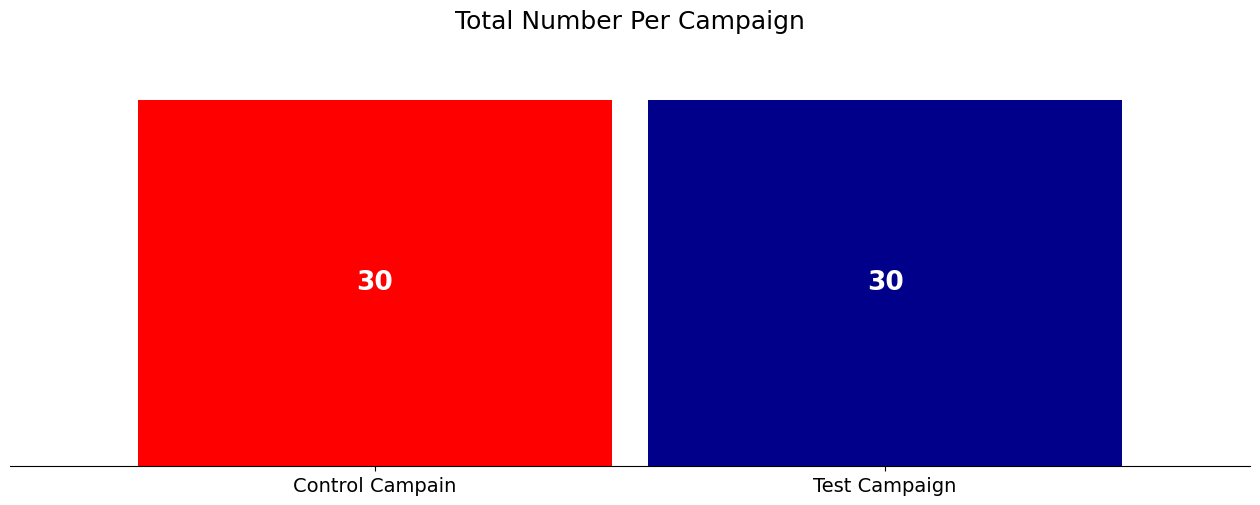

In [37]:
plt.figure(figsize=(16, 5))
c = sns.color_palette(["red", "darkblue"], 2)

campaign = df.groupby(["Campaign Name"])["Campaign Name"].count()

campaign.plot(kind="bar",
              rot=0,
              width=0.93,
              alpha=1,
              fontsize=12,
              color=c)

for i, g in enumerate(campaign):
    plt.text(i, g - 15, "{:0,.0f}".format(g), color='white',
             fontsize=19, fontweight="bold", ha="center", va='center')

plt.title("Total Number Per Campaign", fontsize=18, color="k", pad=38)
plt.xlabel('')
plt.xticks(ticks=range(len(campaign)), labels=["Control Campain", "Test Campaign"], fontsize=14)
plt.yticks([])
sns.despine(left=True)

plt.show()

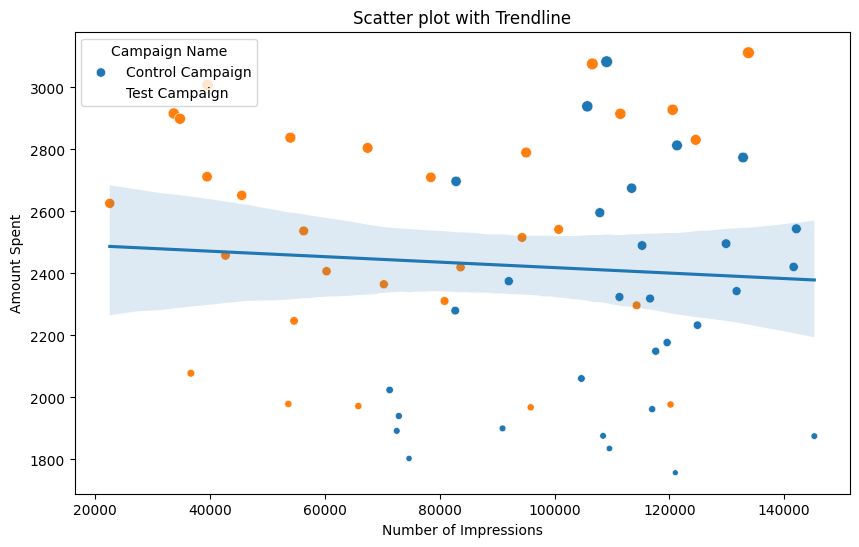

In [42]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=df, x="Number of Impressions", y="Amount Spent", size="Amount Spent", hue="Campaign Name")

# Trendline
sns.regplot(data=df, x="Number of Impressions", y="Amount Spent", scatter=False, label=None)
plt.legend(title='Campaign Name', labels=['Control Campaign', 'Test Campaign'], loc='upper left')

plt.title('Scatter plot with Trendline')
plt.xlabel('Number of Impressions')
plt.ylabel('Amount Spent')
plt.show()

In [47]:
df.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases,Click-Through-Rate,Conversion-Rate,Cost-Per-Click,Cost-Per-Acquisition
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,0.324971,3.689320
1,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,0.076814,0.083937,0.990125,11.796078
2,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,0.216646,3.438356
3,Test Campaign,2019-08-02,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0,0.046238,0.145373,0.545845,3.754801
4,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160,0.360018,6.298387


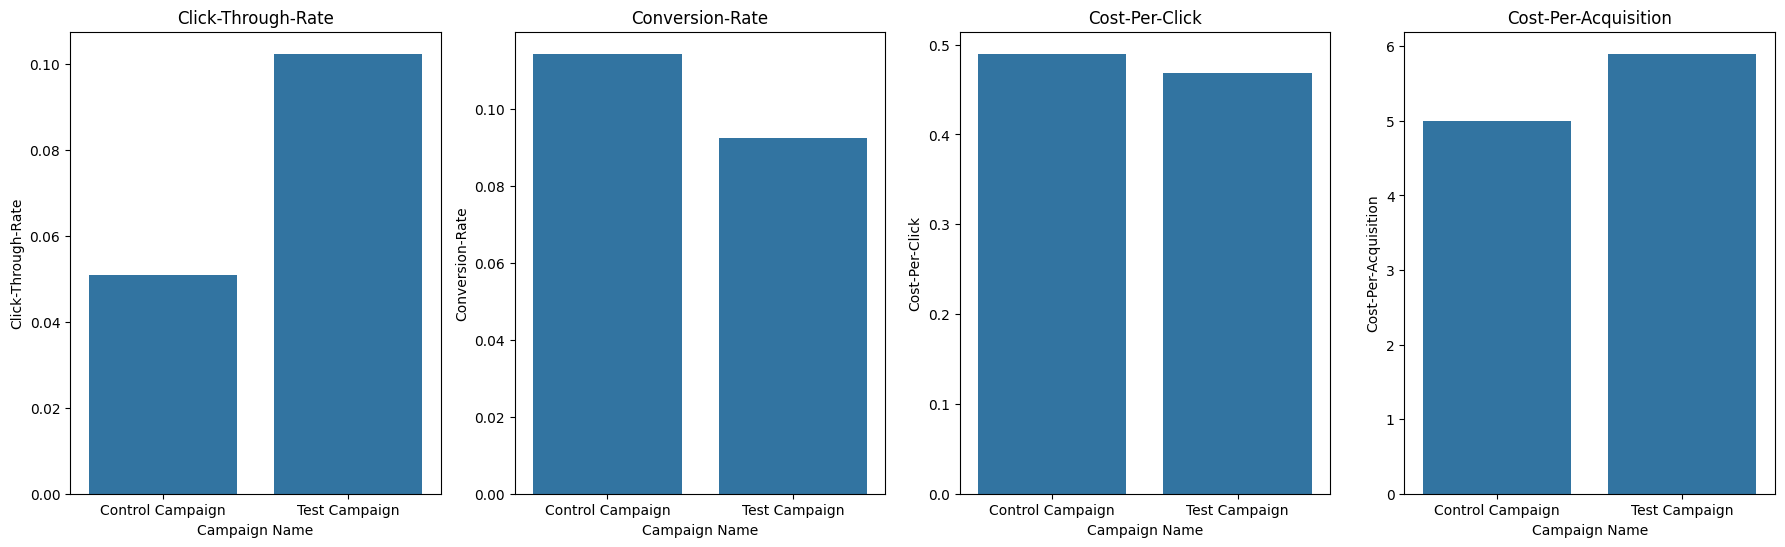

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(22, 6))
ax1 = sns.barplot(data=df, x='Campaign Name', y='Click-Through-Rate', errorbar=None, ax=ax[0], estimator='mean')
ax2 = sns.barplot(data=df, x='Campaign Name', y='Conversion-Rate', errorbar=None, ax=ax[1], estimator='mean')
ax3 = sns.barplot(data=df, x='Campaign Name', y='Cost-Per-Click', errorbar=None, ax=ax[2], estimator='mean')
ax4 = sns.barplot(data=df, x='Campaign Name', y='Cost-Per-Acquisition', errorbar=None, ax=ax[3], estimator='mean')

ax1.set_title('Click-Through-Rate')
ax2.set_title('Conversion-Rate')
ax3.set_title('Cost-Per-Click')
ax4.set_title('Cost-Per-Acquisition')

plt.show()

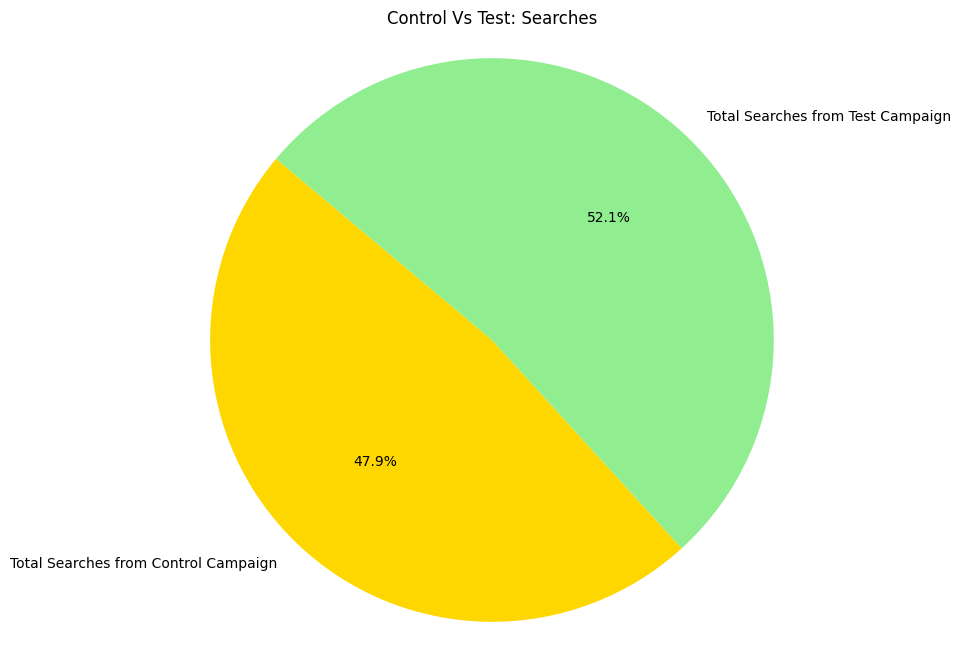

In [51]:
label = ["Total Searches from Control Campaign", 
         "Total Searches from Test Campaign"]
counts = [sum(df_control["Searches Received"]), 
          sum(df_test["Searches Received"])]
colors = ['gold','lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=label, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Control Vs Test: Searches')
plt.axis('equal')
plt.show()

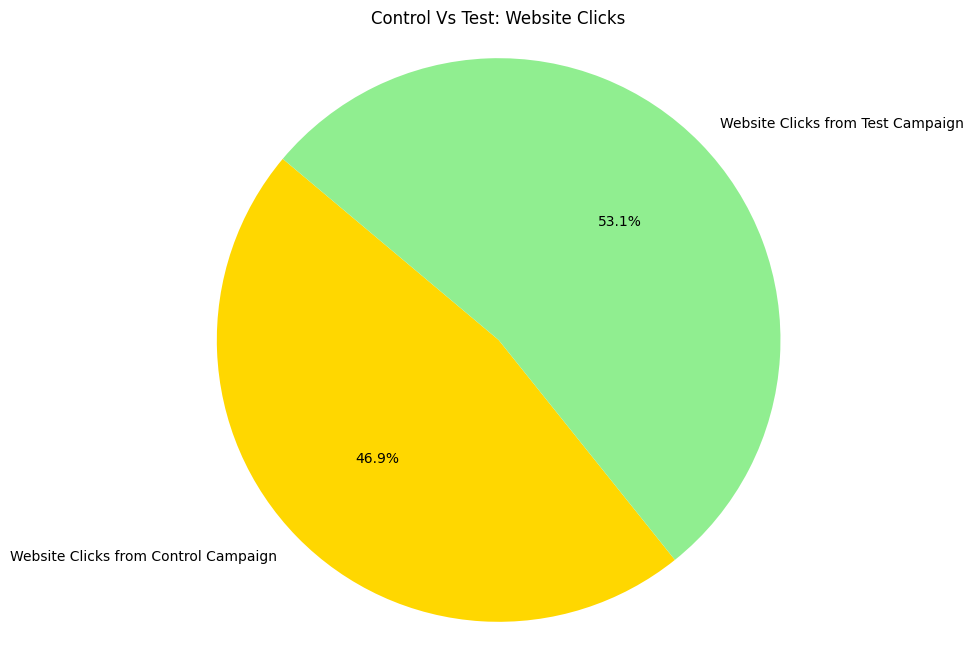

In [52]:
label = ["Website Clicks from Control Campaign", 
         "Website Clicks from Test Campaign"]
counts = [sum(df_control["Website Clicks"]), 
          sum(df_test["Website Clicks"])]
colors = ['gold','lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=label, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Control Vs Test: Website Clicks')
plt.axis('equal')
plt.show()

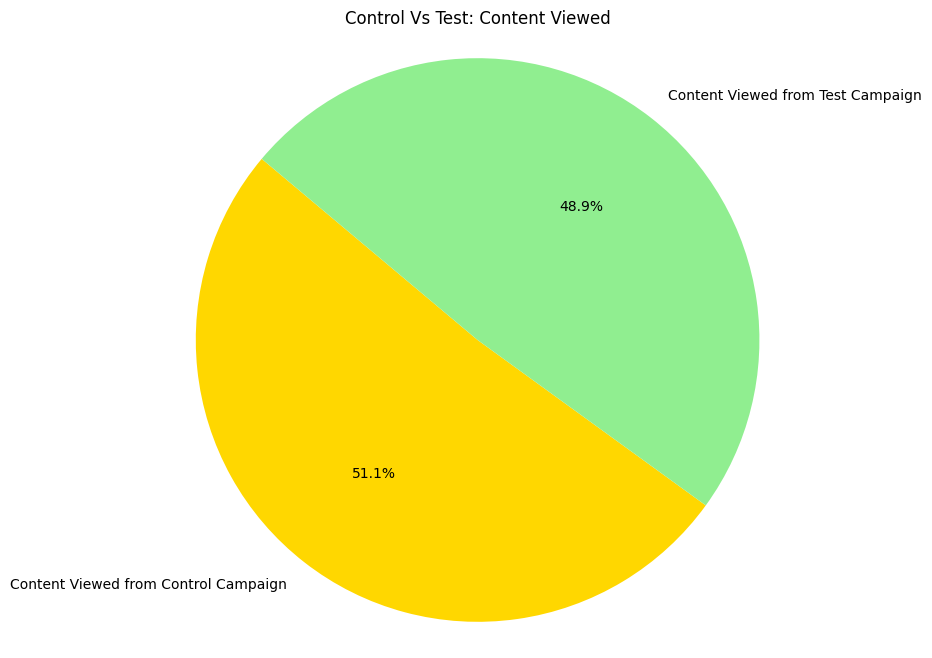

In [53]:
label = ["Content Viewed from Control Campaign", 
         "Content Viewed from Test Campaign"]
counts = [sum(df_control["Content Viewed"]), 
          sum(df_test["Content Viewed"])]
colors = ['gold','lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=label, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Control Vs Test: Content Viewed')
plt.axis('equal')
plt.show()

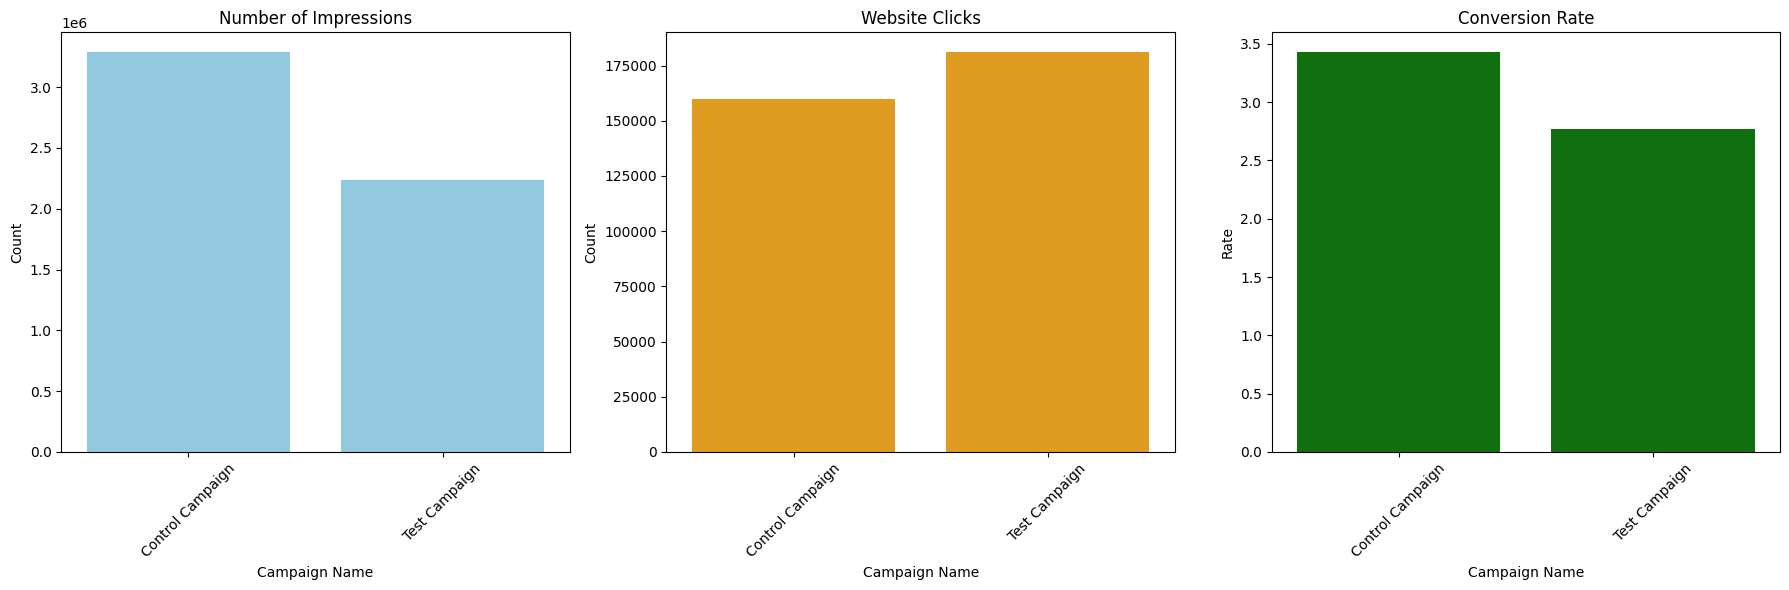

In [54]:

plt.figure(figsize=(18, 6))

impressions_data = df.groupby('Campaign Name')['Number of Impressions'].sum().reset_index()
plt.subplot(1, 3, 1)
sns.barplot(x='Campaign Name', y='Number of Impressions', data=impressions_data, color='skyblue')
plt.title('Number of Impressions')
plt.xlabel('Campaign Name')
plt.ylabel('Count')
plt.xticks(rotation=45)

clicks_data = df.groupby('Campaign Name')['Website Clicks'].sum().reset_index()
plt.subplot(1, 3, 2)
sns.barplot(x='Campaign Name', y='Website Clicks', data=clicks_data, color='orange')
plt.title('Website Clicks')
plt.xlabel('Campaign Name')
plt.ylabel('Count')
plt.xticks(rotation=45)

conversion_data = df.groupby('Campaign Name')['Conversion-Rate'].sum().reset_index()
plt.subplot(1, 3, 3)
sns.barplot(x='Campaign Name', y='Conversion-Rate', data=conversion_data, color='green')
plt.title('Conversion Rate')
plt.xlabel('Campaign Name')
plt.ylabel('Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

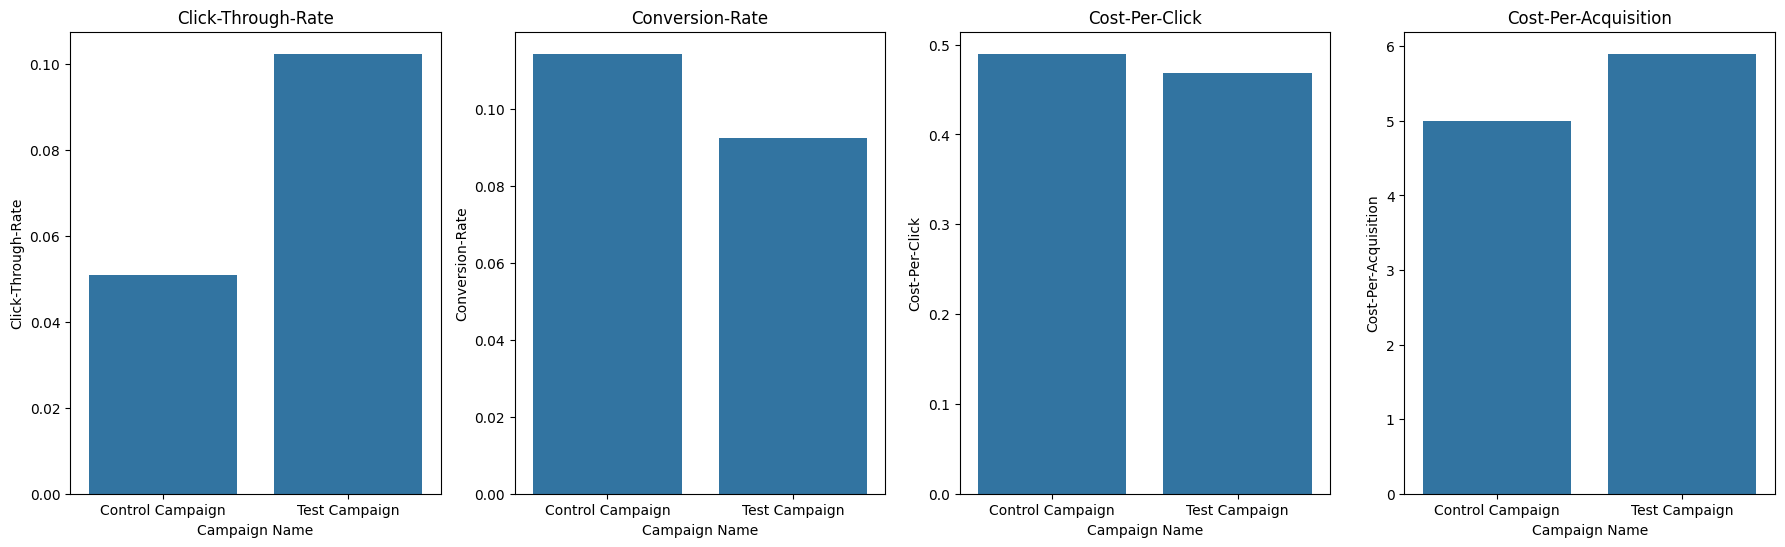

In [55]:
fig, ax = plt.subplots(ncols=4, figsize=(22, 6))
ax1 = sns.barplot(data=df, x='Campaign Name', y='Click-Through-Rate', errorbar=None, ax=ax[0], estimator='mean')
ax2 = sns.barplot(data=df, x='Campaign Name', y='Conversion-Rate', errorbar=None, ax=ax[1], estimator='mean')
ax3 = sns.barplot(data=df, x='Campaign Name', y='Cost-Per-Click', errorbar=None, ax=ax[2], estimator='mean')
ax4 = sns.barplot(data=df, x='Campaign Name', y='Cost-Per-Acquisition', errorbar=None, ax=ax[3], estimator='mean')

ax1.set_title('Click-Through-Rate')
ax2.set_title('Conversion-Rate')
ax3.set_title('Cost-Per-Click')
ax4.set_title('Cost-Per-Acquisition')

plt.show()